<a href="https://colab.research.google.com/github/sdaitzman/DSA2020/blob/master/Midterm_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSA Practice Programming Lab
The goal of this lab is to review the concepts seen in class so far, and to use some of the tools not already implemented for homework. This will be a good starting point to prepare for the midterm exam so make notes of any questions/areas that you find more difficult. 

The first few questions were taken from Cracking the Coding Interview, 6th edition. 

## Question 1: 
Given a short string $s1$ and a long string $s2$, write a function that counts how many permutations of $s1$ are found in $s2$. Also, give the runtime analysis (should be O($n1*n2$) where $n1$ is the length of $s1$ and $n2$ is the length of $s2$). This is roughly linear in $n2$ if $n1$ is small. 

Example: Your function should return three permutations for $s1$ = 'ab', $s2$ = 'baba' (starting at indices 0, 1, 2) and one permutation for $s1$ = 'cake' and $s2$ = 'cacke' (starting at index 1).

In [16]:
s1 = 'ab'
s2 = 'baba'

def permutations(s1, s2):
  '''
  Counts permutations of string s1 in string s2
  '''
  count = 0 # the counter
  d1 = {}   # dict of string 1
  d2 = {}   # dict of string 2

  # Build initial counter dicts from s1 and s2
  for i in range(len(s1)):
    if s1[i] in d1.keys(): # build dict 1
      d1[s1[i]] += 1
    else:
      d1[s1[i]] = 1
    if s2[i] in d2.keys(): # build dict 2
      d2[s2[i]] += 1
    else: 
      d2[s2[i]] = 1
  
  for i in range(len(s2) - len(s1)):
    # iterate through s2
    # skip the part we already have in d2
    if d1 == d2:
      # the subset of s2 is a permutation!
      count += 1

    # shrink or remove the d2 key we're stripping
    if d2[s2[i]] == 1:
      del d2[s2[i]]
    else:
      d2[s2[i]] -= 1

    # grow or create the d2 key to include the new char
    pos = i+len(s1)
    if s2[pos] in d2.keys():
      d2[s2[pos]] += 1
    else: 
      d2[s2[pos]] = 1
    
    
  print(d1)
  print(d2)

  print(i)
  
  
  return count

permutations(s1, s2)

{'a': 1, 'b': 1}
{'b': 1, 'a': 1}
1


2

## Question 2: 
 Given two strings, write a function to check if they are one edit (or zero edits) away. For the purposes of this question, a single edit refers to either inserting a character, deleting a character, or replacing a character.

Example: Your function should return True for "lake" and "bake" (one edit) but False for "lake" and "ace" (two edits).

## Question 3: 
Write a function that takes in two lists $l1$ and $l2$ and returns whether $l2$ is a rotation of $l1$ in $O(n1+n2)$ time, where $n1$ is the length of $l1$ and $n2$ is the length of $l2$. 

Example: Your function should return True for $11 = [h,e,l,l,o]$, $l2 = [e,l,l,o,h]$.

## Question 4: 
Given a list $l$ that is a rotation of a sorted list, write a function that returns the index with the minimum element in O($log n$), where $n$ is the length of $l$.

Example: Your function should return 3 for $l = [4.5, 6, 8.2, 0, 1.3, 1.4]$.

## Question 5: 
Implement Merge Sort using the doubly linked list class you implemented for homework 2. Your algorithm should not have to copy any nodes when recursing (but may have to update O(1) pointer values). 

## Question 6: 
Write a recursive function that returns the total possible number of ways to give exact change for $x$ dollars given a set number of twenty dollar bills, ten dollar bills, five dollar bills, one dollar bills, quarters, dimes, and nickels available. Note that the order of change doesn't matter: 2 nickels and 1 dime is equivalent to 1 dime and 2 nickels. Your runtime should be O($x$). **Hint:** You may want to pass in two lists to your function - one of the different bill/coin values and one with how many there are left of each.  

Example: If $x = 0.50$ and we have two quarters, one dime, and 10 nickels available, there are five possibilities - find them. 

# Challenges 
Pick at least one of the following challenges. I recommend the first one if you'd like to practice divide-and-conquer algorithms.

## Challenge 1 - Skyline Problem
Given a list of buildings including their positions and heights, find the skyline visible using a divide-and-conquer approach. See image below for a skyline example. First, you should think about how you will represent a building and how you will represent the outputted skyline. You may assume all buildings are rectangular (what a boring city). 

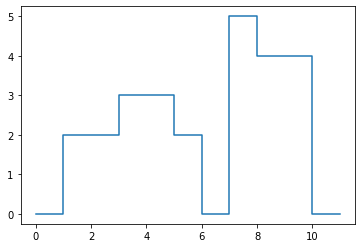

In [0]:
import matplotlib.pyplot as plt
plt.step([i for i in range(12)], [0,0,2,2,3,3,2,0,5,4,4,0])

## Challenge 2 - Minesweeper
Design an object class to represent the game of minesweeper. Think about how the way you represent the game will impact the runtime of updating the grid. You may also want to allow the user to start a game with different difficulty levels. 

If you want to add some funk, think about how you can change the structure or elements of the game (maybe the landscape isn't a grid? are there fun surprises to uncover?)